### Caso Viscosímetro de Tambor con Fluidos Inmiscibles

_G. Raush_

_Setiembre 2019_

_**Departamento de Mecànica de Fluids-UPC**_

Calcular el par motor necesario apra llegar a un régimen estacionario en el caso de un viscosimetro de tambor con doble fluido inmicsible $\mu_1$ y $\mu_2$.
el tambor interior gira a velocidad $\omega$ , perfectamente centrado respecto del vaso exterior de diámetro $D$. Los separa el fluido de viscosidad $\mu_1$ existiendo en la parte inverior un fluido con viscosidad $\mu_2$.

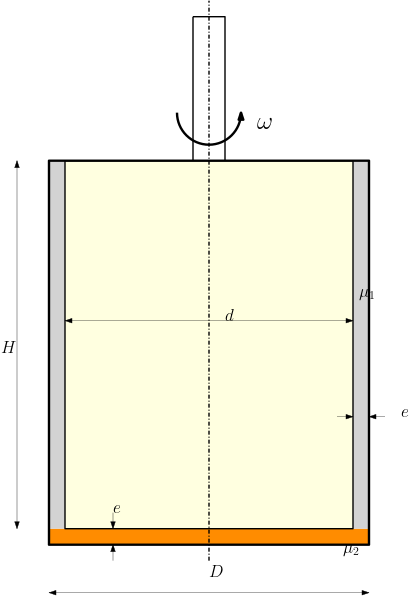

In [4]:
from IPython.display import Image
Image(filename='viscosimetroDeTamborDosFluidos.png', width=300)

<!-- <img src='viscosimetroDeTamborDosFluidos.png' style='width=100px'/> -->

Comandos Importación de paquetes   necesarios para  el tratamiento simbólico

In [46]:
import sympy as sp
import matplotlib.pyplot as plt
from sympy.printing import latex
%matplotlib inline


Definición de las variables del problema

In [47]:
e,D,d,H,h,omega,pi,mu1,mu2,g = sp.symbols('e,D,d,H,h,omega,pi,mu1,mu2,g')
dh, tau1 = sp.symbols('dh,tau1')
dV_dy = sp.symbols('dV/dy')

Ley de Newton de la viscosidad

In [48]:
tau1 = mu1*dV_dy
#sp.pprint(tau1)
tau1

dV/dy*mu1

Asumiendo un perfil de velocidad lineal, el  gradiente de la velocidad es una constante. 

In [49]:
tau1 = tau1.subs(dV_dy,omega*D/2/h)
#sp.pprint(tau1)
tau1

D*mu1*omega/(2*h)

$$\tau_1 = \frac{D \mu_{1} \omega}{2 h}$$

Por definición , el esfuerzo $\tau_1$ en una fuerza repartida en un área. Por lo tanto, para calcular la fuerza ejercida necesitamos conocer el área de aplicación.

In [51]:
dA,dz = sp.symbols('dA,dz')
dA = pi*D*dz
dA

D*dz*pi

El diferencial de área , $dA = \pi D dz$

El diferencial de momentos es el producto del diferencial de fuerza por el brazo de palanca

In [52]:
dM = sp.symbols('dM1')
dM = (tau1*dA)*D/2
dM

D**3*dz*mu1*omega*pi/(4*h)

El diferencial de momento es función lineal con el número de revoluciones, por tratarse de un fluido newtoniano, (tiene un  perfil de velocidad lineal en su gradiente)

$$dM = \frac{D^{3}  \mu_{1} \omega \pi}{4 h}dz$$

Integramos en el dominio de la variable, $0 \le z \le H$. Este es el momento total aplicado en la pared del cilindro.

In [54]:
M1 = sp.integrate(dM/dz,H)
#sp.pprint(M1)
M1

D**3*H*mu1*omega*pi/(4*h)

$$M_1 = \frac{D^{3} H \mu_{1} \omega \pi}{4 h}$$ 

Ecuación de momentos mecánicos en la pared de la base del cilindro rotante. Hay dos momentos diferentes debido a la existencia de dos fluidos. En ambos casos se calculan igual, solo que cambian las propiedades de los fluidos y los límites de integración.


In [56]:
r,dr = sp.symbols('r,dr')

Caso para el fluido 1, viscosidad: $\mu_1$. La región de existencia es entre $d/2 \le r \le D/2$  

In [57]:
dM = ((omega*r/e)*mu1)*(2*pi*r)*r*dr
M2 = sp.integrate(dM/dr,(r,d/2,D/2))
#sp.pprint(M2)
M2

D**4*mu1*omega*pi/(32*e) - d**4*mu1*omega*pi/(32*e)

In [58]:
M2 = M2.simplify()
#sp.pprint(M2)
M2

mu1*omega*pi*(D**4 - d**4)/(32*e)

$$M_2 = \frac{\mu_{1} \omega \pi \left(D^{4} - d^{4}\right)}{32 e}$$

Cálculo similar para el caso del Fluido 2, viscosidad : $\mu_2$, en el caso del ejemplo _Agua_

Ahora el dominio de la variable de integración es $0 \le r \le d/2$

In [60]:
dM = ((omega*r/e)*mu2)*(2*pi*r)*r*dr
M3 = sp.integrate(dM/dr,(r,0,d/2))
M3 #sp.pprint(M3)

d**4*mu2*omega*pi/(32*e)

In [61]:
#latex(M3)

$$M_3 = \frac{d^{4} \mu_{2} \omega \pi}{32 e}$$

El momento total sobre el rotor es la sumatoria de ellos. $$M_t = \sum M_i$$


In [62]:
M = M1+M2+M3
M #sp.pprint(M)
#sp.print_latex(M)

D**3*H*mu1*omega*pi/(4*h) + d**4*mu2*omega*pi/(32*e) + mu1*omega*pi*(D**4 - d**4)/(32*e)

Solución del momento total:

$$M = \frac{D^{3} H \mu_{1} \omega \pi}{4 h} + \frac{d^{4} \mu_{2} \omega \pi}{32 e} + \frac{\mu_{1} \omega \pi \left(D^{4} - d^{4}\right)}{32 e}$$

Como vemos en la expresión anterior, la presencia de un fluido extraño, por ejemplo: agua en aceite, el término de $\mu_2$ desaparecería.  

In [64]:
M.subs(mu2,0).simplify()

mu1*omega*pi*(8*D**3*H*e + h*(D**4 - d**4))/(32*e*h)

De donde se puede despejar $\mu_1$ y obtener la constante de calibración del viscosímetro.

La potencia consumida por el viscosímetros es,

In [65]:
Pw = omega * M.subs(mu2,0)
Pw.expand().simplify()

mu1*omega**2*pi*(8*D**3*H*e + h*(D**4 - d**4))/(32*e*h)

In [66]:
Pw = sp.Symbol('Pot')
eq = sp.Eq(Pw - omega * M.subs(mu2,0))
#eq
#sp.solve(eq,mu1)

Con la medida de la potencia $P_{tot}$ y una velocidad $\omega$ se puede conocer el valor de la viscosidad $\mu_1$ y los demás términos constantes se pueden conocer haciendo una calibración del viscosímetro usando un fluido de referencia como el agua.

In [67]:
sp.solve(eq,mu1)[0].simplify()

32*Pot*e*h/(omega**2*pi*(D**4*h + 8*D**3*H*e - d**4*h))